# Homework 2: Document Classification

## 1. Text pre-processing and exploration:

In [64]:
import sys
import os
# sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(__file__))))
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


path = r"C:\ohsumed-first-20000-docs"
pathTrain = path + r"\training"
pathTest = path + r"\test"

stop_words = (stopwords.words('english'))
filesInCategory = []
topWordsInCat = []



In [65]:
def preProcessing(text):
    procc_text=""
    for token in text:
        token = token.lower()
        if not token.isdigit() and token not in stop_words and len(token) > 1:
            token = PorterStemmer().stem(token)
            if token not in stop_words and len(token) > 1:
                procc_text += token + " "
    return procc_text

def proccessText(corpus_path):
    fileText = []
    for folder in os.listdir(corpus_path):
        for document in os.listdir( os.path.join(corpus_path, folder)):
            fileDir = os.path.join(os.path.join(corpus_path, folder), document)
            with open(fileDir) as Content:
                fileContent = Content.read()
            #getting the tokens from the file contenct
            file_tokens = nltk.word_tokenize(fileContent)
            text_PreProccessed=preProcessing(file_tokens)
            fileText.append([document, text_PreProccessed, folder])
    return pd.DataFrame(fileText, columns=['Document', 'Text', 'Category'])




In [66]:
preProcessedDF = proccessText(pathTrain)
allCategories = preProcessedDF['Category']
CategoriesList = np.unique(allCategories)
print("Number of categories:",  CategoriesList.size)

Number of categories: 23


In [27]:
#getting number of documants in each category
filesInCategory = []
for category in CategoriesList:
    fileByCat = preProcessedDF.loc[preProcessedDF['Category'] == category]
    filesInCategory.append([category, len(fileByCat)])
pd.DataFrame(filesInCategory, columns=['Category', 'Num of Docs']).head(23)



,Category,Num of Docs
0,C01,423
1,C02,158
2,C03,65
3,C04,1163
4,C05,283
5,C06,588
6,C07,100
7,C08,473
8,C09,125
9,C10,621


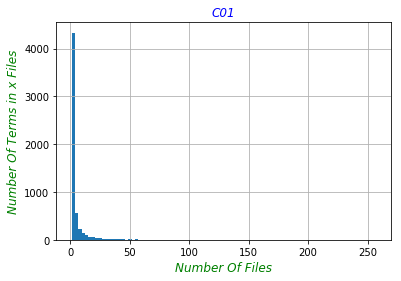

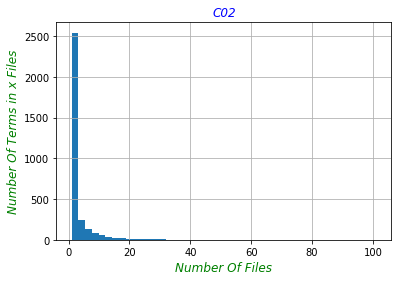

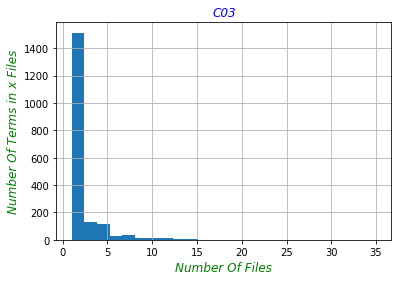

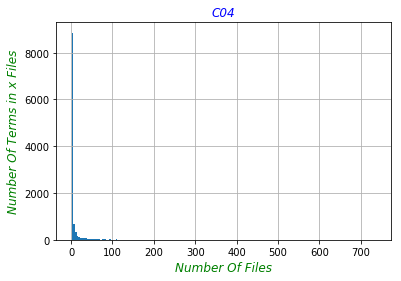

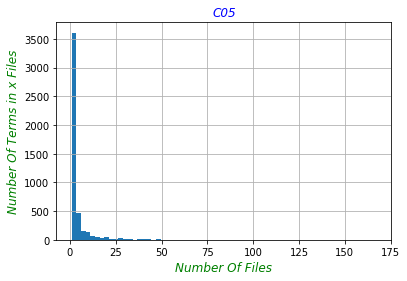

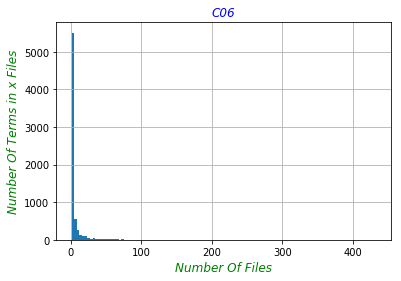

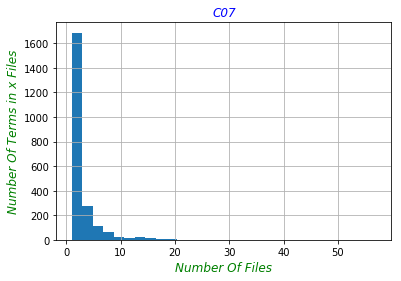

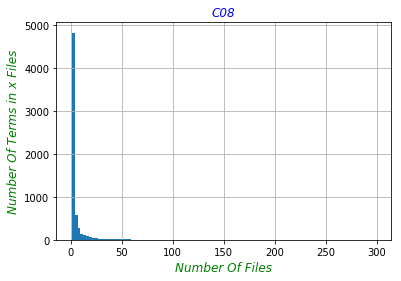

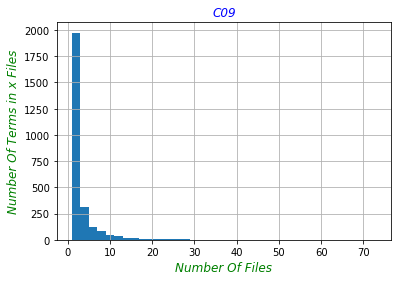

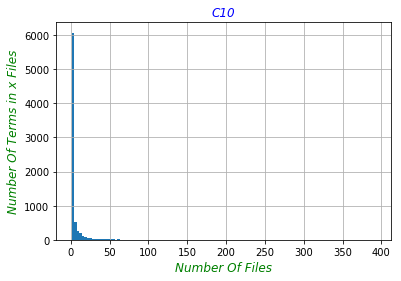

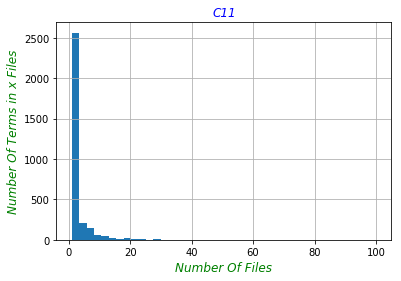

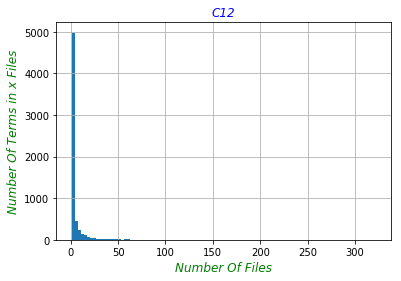

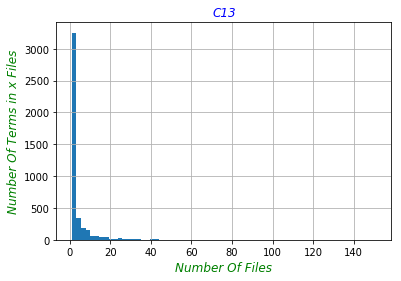

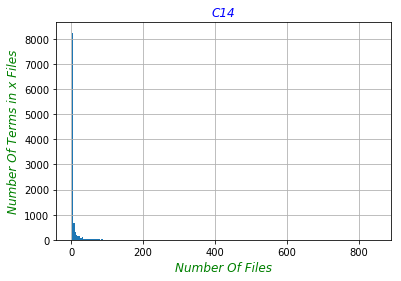

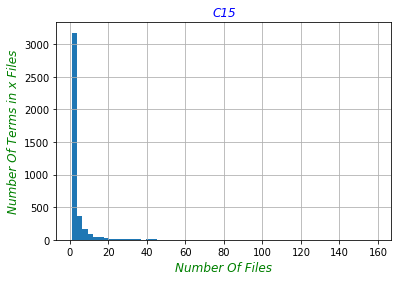

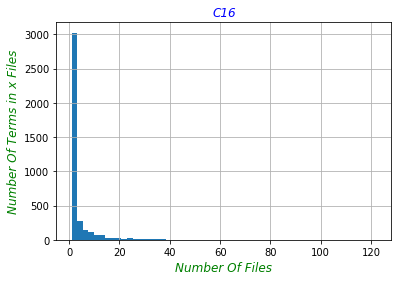

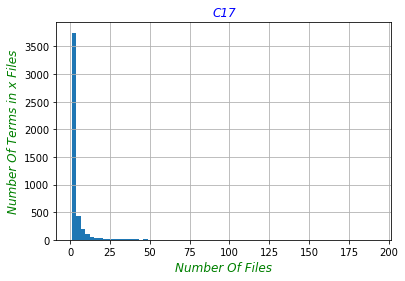

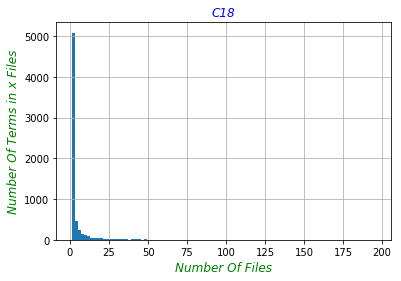

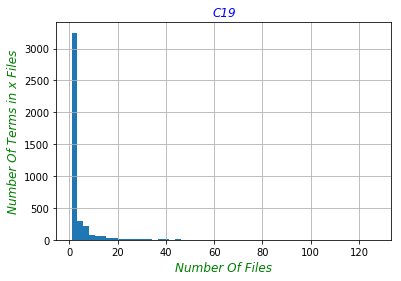

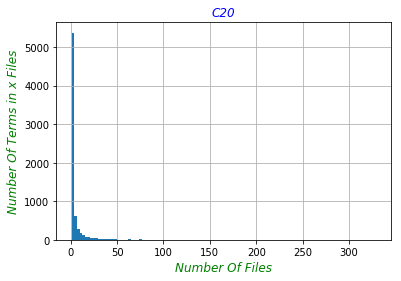

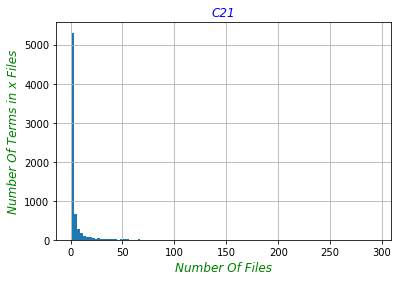

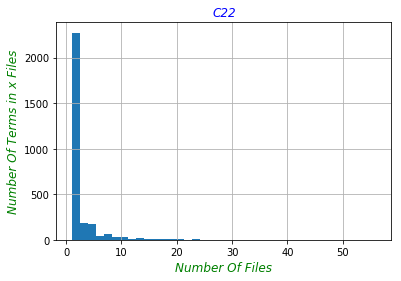

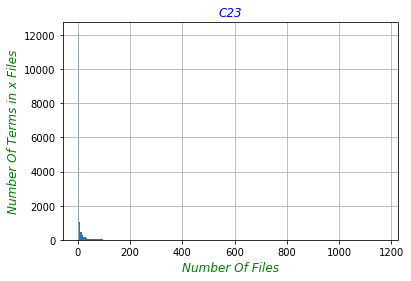

In [9]:
for category in CategoriesList:
    # get number of files in category
    fileByCat=preProcessedDF.loc[preProcessedDF['Category']==category]

    # get only unic terms
    unicTerm = " ".join([" ".join(set(term.split(" "))) for term in fileByCat['Text']])
    termsPerDoc = pd.Series((unicTerm).split()).value_counts()

    # get the most frequent words in all categories
    topTerms= termsPerDoc[:10]
    topWordsInCat.append([category] + list(zip(topTerms.index, topTerms)))

    #producing plot
    TermFreq = pd.DataFrame(list(zip(termsPerDoc.index, list(termsPerDoc))), columns=['Term','Frequency'])
    fig = TermFreq.hist(column="Frequency", bins=len(set(TermFreq['Frequency'])))
    plt.title(category,color='blue', fontsize=12,style='italic')
    plt.xlabel("Number Of Files",color='green', fontsize=12,style='italic')
    plt.ylabel("Number Of Terms in x Files",color='green', fontsize=12,style='italic')
    plt.show()


In [15]:


df=(pd.DataFrame(topWordsInCat, columns=['Category','1','2','3','4','5','6','7','8','9','10']))
df.head(23)

,Category,1,2,3,4,5,6,7,8,9,10
0,C01,"(patient, 257)","(infect, 242)","(studi, 144)","(case, 143)","(use, 132)","(clinic, 127)","(treatment, 127)","(result, 117)","(may, 114)","(diseas, 111)"
1,C02,"(infect, 101)","(patient, 87)","(viru, 74)","(human, 63)","(studi, 55)","(diseas, 50)","(use, 50)","(clinic, 49)","(immunodefici, 48)","(case, 44)"
2,C03,"(infect, 35)","(patient, 33)","(studi, 28)","(diseas, 23)","(parasit, 21)","(case, 21)","(treatment, 19)","(use, 18)","(present, 17)","(antibodi, 16)"
3,C04,"(patient, 737)","(tumor, 473)","(studi, 435)","(cell, 415)","(use, 403)","(case, 383)","(result, 353)","(carcinoma, 342)","(cancer, 331)","(treatment, 308)"
4,C05,"(patient, 167)","(use, 102)","(studi, 99)","(result, 95)","(case, 73)","(clinic, 71)","(may, 70)","(one, 64)","(diseas, 64)","(bone, 62)"
5,C06,"(patient, 433)","(studi, 257)","(diseas, 197)","(use, 193)","(may, 178)","(result, 177)","(two, 156)","(associ, 153)","(less, 145)","(one, 143)"
6,C07,"(patient, 57)","(case, 39)","(use, 34)","(treatment, 33)","(present, 31)","(studi, 29)","(result, 26)","(report, 24)","(gland, 21)","(may, 20)"
7,C08,"(patient, 299)","(studi, 187)","(lung, 167)","(use, 164)","(pulmonari, 157)","(result, 151)","(diseas, 140)","(case, 125)","(clinic, 124)","(increas, 124)"
8,C09,"(patient, 73)","(use, 49)","(studi, 46)","(case, 42)","(result, 41)","(present, 39)","(treatment, 34)","(clinic, 31)","(one, 30)","(diseas, 28)"
9,C10,"(patient, 393)","(studi, 250)","(use, 206)","(may, 180)","(result, 179)","(clinic, 162)","(suggest, 149)","(case, 148)","(present, 145)","(effect, 138)"


`From the graphs above, we can distinguish the following conclusion:
There are many words that are common to multiple categories, such as: 'patients', 'may', 'infact'.
Thus, it may be challenging for the model to distinguish between categories. 
On the contrary, the are few categories that includes frequent words that are unique to the category, such as in c14, that contains the words: ' heart' (344), ' arteri' (458).
This words are unique to the category, and very frequent at the category. Thus, it will be easier to the model the distinguish this category.`

## 2. Document classification:

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
import warnings; warnings.simplefilter('ignore')
from sklearn.linear_model import Perceptron

In [69]:
preProcessedTestSet = proccessText(pathTest)

In [71]:
classificationTable = []
bestFeature = ''
bestCLF = ''
bestParams=''

In [72]:

def calcModels():
    bestAccuracy = 0.0
    for clf, clf_name in ((SGDClassifier(),"SVM"), (MultinomialNB(),"Naive Bayes")):
        print('=' * 80)
        print(clf_name)
        for fe ,fe_name in ((TfidfVectorizer(), "TF-IDF"), (CountVectorizer(),"Bag of Words")):
            print('-' * 80)
            print(fe_name)
            parameters =  {'vect__max_df': (0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),'clf__alpha': (0.00001,0.0001,0.001,0.01,0.1,1.0)}
            nb_clf =Pipeline([('vect',fe ), ('clf',clf )])
            gs_clf = GridSearchCV(nb_clf, parameters, n_jobs=1)
            gs_clf = gs_clf.fit(preProcessedDF['Text'].tolist(), preProcessedDF['Category'].tolist())
            prediction = gs_clf.predict(preProcessedDF['Text'].tolist())
            accuracy = metrics.accuracy_score(preProcessedDF['Category'].tolist(), prediction)
            print('accuracy:', accuracy)
            print('Best score: ',gs_clf.best_score_)
            print('Best params: ',gs_clf.best_params_)

            if accuracy > bestAccuracy:
                    bestAccuracy = accuracy
                    bestFeature = fe_name
                    bestCLF = clf_name
                    bestParams= gs_clf.best_params_
    
   
    print("")
    print(":best results")
    print("feature extraction method-",bestFeature)
    print("classifier-",bestCLF)
    print("accurecy-",bestAccuracy)

                



In [73]:
calcModels()

SVM
--------------------------------------------------------------------------------
TF-IDF
accuracy: 0.5905300488833509
Best score:  0.40343141953417044
Best params:  {'clf__alpha': 0.0001, 'vect__max_df': 0.7}
--------------------------------------------------------------------------------
Bag of Words
accuracy: 0.49928112719256207
Best score:  0.3936547493530145
Best params:  {'clf__alpha': 0.1, 'vect__max_df': 0.8}
Naive Bayes
--------------------------------------------------------------------------------
TF-IDF
accuracy: 0.5860251126234065
Best score:  0.37678520080513755
Best params:  {'clf__alpha': 0.01, 'vect__max_df': 0.3}
--------------------------------------------------------------------------------
Bag of Words
accuracy: 0.5417425476852296
Best score:  0.38943736221604525
Best params:  {'clf__alpha': 1.0, 'vect__max_df': 0.3}
summerize table:
[['TF-IDF', 'SVM', {'clf__alpha': 0.0001, 'vect__max_df': 0.7}, 0.5905300488833509], ['Bag of Words', 'SVM', {'clf__alpha': 0.1, 'v

`As the results shows, the best models we got includes the feature extraction method TF-IDF ,the machine learning
model SVM and the parameters of {clf__alpha: 0.0001, vect__max_df: 1.0}. the accurecy we get is 0.5905.

we would like to optimize the results even more by changing the pre-processing step.
we metioned before the problematic of words that are common to multiple categories. there for we will try to add these words to the stop words group in order to help the machine learning model.
we chose the words: patient ,studi, use, case, diseas and may. after adding these words to the stop-words, we will pre-process the texts and compare between the models once again.`


In [74]:
stop_words +=['patient','studi','use','case','may', 'diseas']

newPreProcessedDF = proccessText(pathTrain)

classificationTable = []
bestFeature = ''
bestCLF = ''
bestParams=''

calcModels()

SVM
--------------------------------------------------------------------------------
TF-IDF
accuracy: 0.5913926962522764
Best score:  0.40151442538100257
Best params:  {'clf__alpha': 0.0001, 'vect__max_df': 0.3}
--------------------------------------------------------------------------------
Bag of Words
accuracy: 0.5008147225150963
Best score:  0.3946132464295984
Best params:  {'clf__alpha': 0.1, 'vect__max_df': 0.3}
Naive Bayes
--------------------------------------------------------------------------------
TF-IDF
accuracy: 0.5860251126234065
Best score:  0.37678520080513755
Best params:  {'clf__alpha': 0.01, 'vect__max_df': 0.3}
--------------------------------------------------------------------------------
Bag of Words
accuracy: 0.5417425476852296
Best score:  0.38943736221604525
Best params:  {'clf__alpha': 1.0, 'vect__max_df': 0.3}
summerize table:
[['TF-IDF', 'SVM', {'clf__alpha': 0.0001, 'vect__max_df': 0.3}, 0.5913926962522764], ['Bag of Words', 'SVM', {'clf__alpha': 0.1, 've

`After changing the Text pre-processing by removing some common words, we do see an improvment - the accurecy is better. Regarding to the best model (SVM, TF-IDF), the total accurecy improved from 0.5905 to 0.5913.
we will still chose the model of TF-IDF combined with SVM.`